# BigData Spliter 

## Challenge description 

Vous êtes chargé de développer un script Python qui permettra de diviser un fichier CSV contenant des données en trois parties : JSON, base de données et CSV.
Le script devra être en mesure de transférer 30% des données sous format JSON, 30% dans une base de données et le reste au format CSV.

Vous devez suivre les étapes suivantes pour compléter le challenge :

Chargement des données : Le script doit être capable de charger les données à partir d'un fichier CSV. Assurez-vous que le fichier CSV a une en-tête en première ligne.
Répartition des données : Vous devez mélanger les lignes du fichier CSV pour garantir une répartition aléatoire des données. Ensuite, calculez le nombre de lignes nécessaires pour chaque destination : 30% pour le fichier JSON, 30% pour la base de données et le reste pour le fichier CSV.
Création du fichier JSON : Sauvegardez la partie des données destinée au format JSON dans un fichier JSON. Chaque ligne du fichier JSON doit représenter une entrée des données du fichier CSV.
Création du fichier CSV : Sauvegardez la partie des données destinée au format CSV dans un fichier CSV. Assurez-vous de ne pas inclure l'en-tête dans ce fichier.
Transfert vers la base de données : Sauvegardez la partie des données destinée à la base de données dans une base de données. Utilisez le nom de table fourni comme argument dans le script.
Ajoutez la possibilité de spécifier un taux de répartition personnalisé (par exemple, 40% JSON, 25% base de données, 35% CSV).
Votre script devra être flexible et prendre les arguments nécessaires en entrée, tels que le nom du fichier CSV d'origine, le nom du fichier JSON de sortie, le nom de la base de données et le nom de la table de base de données.

N.B: Vous pouvez Testez le script sur n'importe quelle Dataset que vous désirer 

## Chargement des donnees 

In [6]:
from sqlalchemy import create_engine
import pandas as pd 
import seaborn as sns 
import mysql.connector
import json

In [7]:
df = pd.read_csv('treatedData.csv', encoding='unicode_escape')

In [8]:
df_shuffled = df.sample(frac = 1, random_state = 42)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4649 entries, 0 to 4648
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4649 non-null   int64  
 1   ID                   4649 non-null   object 
 2   Date                 4649 non-null   object 
 3   Age                  4649 non-null   float64
 4   Sex                  4649 non-null   object 
 5   Race                 4649 non-null   object 
 6   ResidenceCity        4649 non-null   object 
 7   ResidenceCounty      4649 non-null   object 
 8   DeathCity            4649 non-null   object 
 9   DeathCounty          4649 non-null   object 
 10  DescriptionofInjury  3971 non-null   object 
 11  InjuryPlace          4649 non-null   object 
 12  InjuryCity           4649 non-null   object 
 13  InjuryCounty         4649 non-null   object 
 14  COD                  4649 non-null   object 
 15  Heroin               4649 non-null   i

In [33]:
df.describe()

,Unnamed: 0,Age,Heroin,Cocaine,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS
count,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000
mean,2557.695203,41.975048,0.497526,0.291891,0.077651,0.120886,0.021510,0.243278,0.024091,0.265218,0.094214,0.030544,0.026242,0.004732,0.016778
std,1469.814886,12.326534,0.500048,0.454681,0.267651,0.326030,0.145093,0.429108,0.153349,0.441497,0.292157,0.172098,0.159872,0.068635,0.128452
min,5.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1291.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2557.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3829.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5103.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df = df.drop('Unnamed: 0' , axis = 1 )

<Axes: >

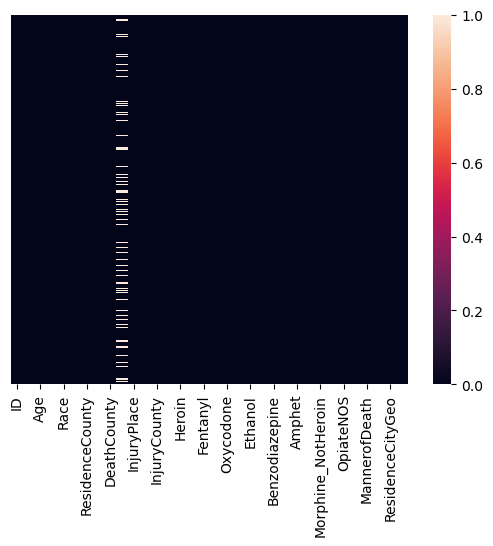

In [35]:
sns.heatmap(df.isnull() , yticklabels = False)

### Function To Cast A Part Of The Csv File Into Json Format 

In [36]:
def save_to_files(df, json_filename, csv_filename):
    df.to_csv(csv_filename, index=False)
    df_dict = df.to_dict(orient='records')
    with open(json_filename, 'w') as json_file:
        json.dump(df_dict, json_file)


### Function To Insert The Remains Of The Csv File , To Relational DataBase   

In [37]:
def save_to_mysql(df, host, user, password, database, table_name):
    conn_str = f"mysql+mysqlconnector://{user}:{password}@{host}/{database}"
    engine = create_engine(conn_str)
    
    df.iloc[:0].to_sql(table_name, engine, if_exists='replace', index=False)
    
    # Insert the data into the table
    df.to_sql(table_name, engine, if_exists='append', index=False)

### Usage Exemple 

In [ ]:
csv_file = input("Enter the name of the CSV file: ")
json_percentage = float(input("Enter the percentage for JSON format (0-100): "))
csv_percentage = float(input("Enter the percentage for CSV format (0-100): "))

df = pd.read_csv(csv_file)

# Calculate the number of rows for each format based on the percentages
total_rows = len(df)
json_rows = int(total_rows * json_percentage / 100)
csv_rows = int(total_rows * csv_percentage / 100)

# Calculate the end indices for each format
json_end = json_rows
csv_end = json_end + csv_rows

json_df = df.iloc[:json_end]
csv_df = df.iloc[json_end:csv_end]

json_filename = "JsonData.json"
csv_filename = "CsvData.csv"
save_to_files(json_df, json_filename, csv_filename)

# Save the rest of the DataFrame to MySQL database
mysql_host = input("Enter MySQL host: ")
mysql_user = input("Enter MySQL user: ")
mysql_password = input("Enter MySQL password: ")
mysql_database = input("Enter MySQL database: ")
mysql_table = input("Enter the table name for the data: ")

save_to_mysql(df.iloc[csv_end:], mysql_host, mysql_user, mysql_password, mysql_database, mysql_table)

print("Splitting and saving completed successfully.")